In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '/content/drive/MyDrive/Project 2/Technology & Sustainability/train.csv'
df = pd.read_csv(path)
df.head(1)

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue
0,2023-07,Oceania,Toyota,i4,Crossover,62,6,High Income,No,260,3699780


In [ ]:
df['Date'][0]

'2023-07'

In [ ]:
df['Date'][0].split('-')[1]

'07'

In [ ]:
months = []
for i in df['Date']:
  months.append(i.split('-')[1])  #extracting months
df['Months'] = months #new column with months
df.head(1)

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue,Months
0,2023-07,Oceania,Toyota,i4,Crossover,62,6,High Income,No,260,3699780,07


In [ ]:
df['Price']=df['Revenue']/df['Units_Sold']
df.head(1)

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue,Months,Price
0,2023-07,Oceania,Toyota,i4,Crossover,62,6,High Income,No,260,3699780,07,14229.923077


In [ ]:
################################################################################################################################################################################

# **Which brands are popular in each region**

In [ ]:
brand_popularity = df.pivot_table(index='Region',columns='Brand',values='Units_Sold',aggfunc='sum',fill_value=0)

brand_popularity

Brand,BMW,BYD,Ford,Hyundai,Kia,Nissan,Tesla,Toyota,Volkswagen
Region,,,,,,,,,
Africa,3893,1055,2230,4112,4226,1765,380,5102,2725
Asia,1204,1047,2153,2474,2927,1296,1006,624,911
Europe,117,368,1619,479,1066,688,0,1442,1038
North America,5241,4140,2572,5191,5065,4080,1858,2632,2857
Oceania,5024,4627,5211,2670,3222,3442,3476,2343,2442
South America,1124,1330,388,1250,1367,1149,822,595,940


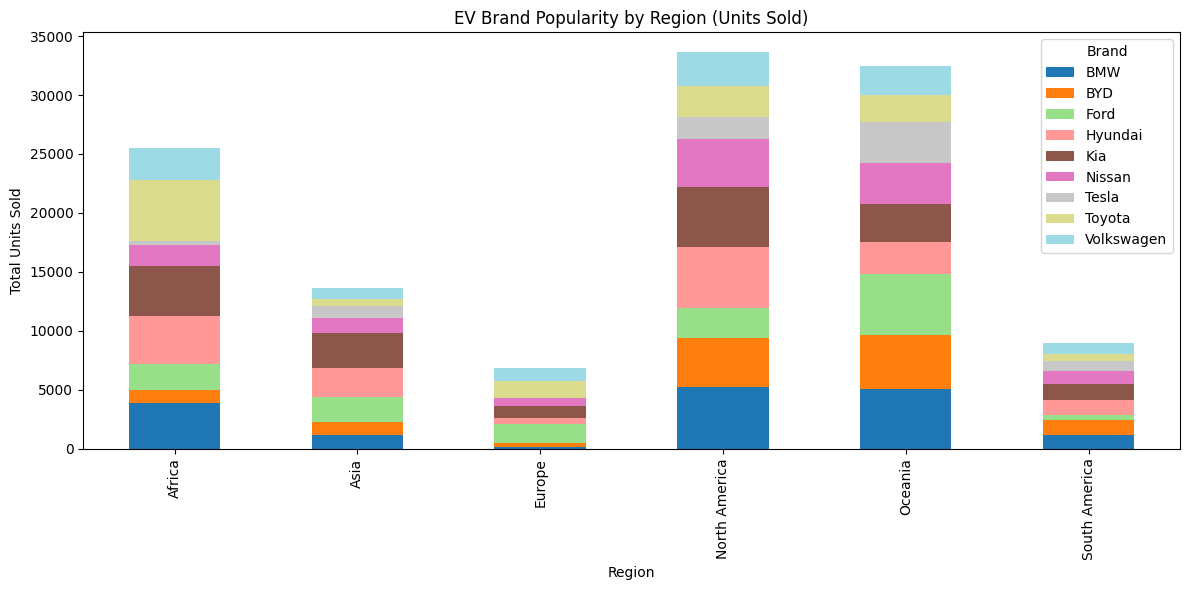

In [ ]:

brand_popularity.plot( kind='bar', stacked=True, figsize=(12, 6),colormap='tab20')

plt.title('EV Brand Popularity by Region (Units Sold)')
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.legend(title='Brand')
plt.tight_layout()
plt.show()

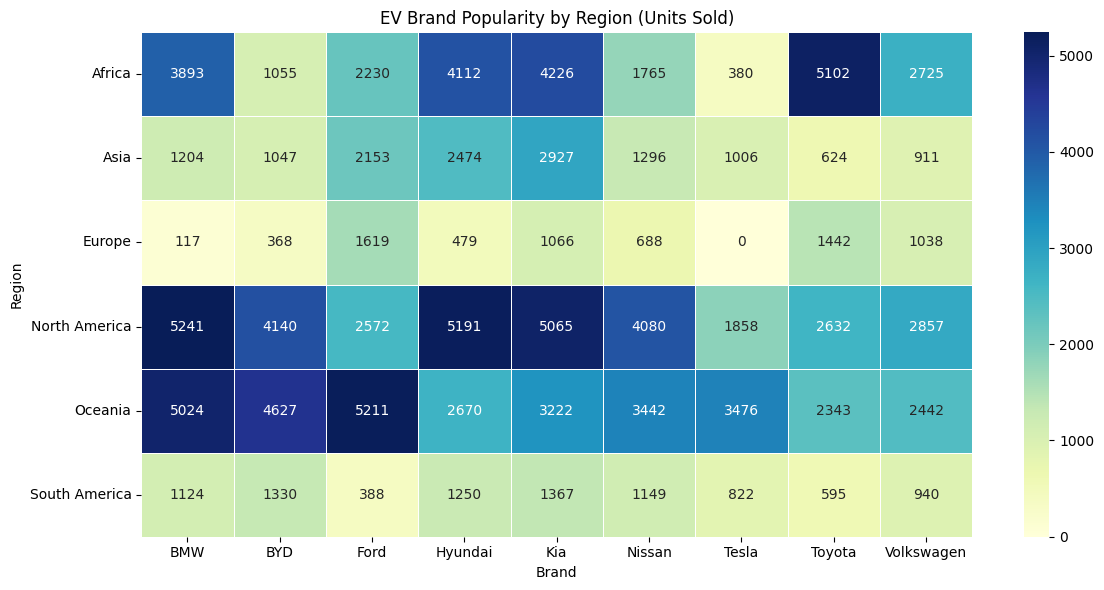

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(brand_popularity, annot=True, fmt="d", cmap='YlGnBu', linewidths=.5)

plt.title('EV Brand Popularity by Region (Units Sold)')
plt.xlabel('Brand')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# **Which Vehicle_Type are popular in each region**

In [ ]:
vechile_type_popularity = df.pivot_table(index='Region',columns='Vehicle_Type',values='Units_Sold',aggfunc='sum',fill_value=0)

vechile_type_popularity

Vehicle_Type,Coupe,Crossover,Hatchback,SUV,Sedan,Truck
Region,,,,,,
Africa,3241,2186,7806,5233,2652,4370
Asia,1875,1534,3108,2467,1436,3222
Europe,852,916,2374,330,824,1521
North America,3532,2544,10661,4067,4107,8725
Oceania,2815,2386,12096,4415,2401,8344
South America,956,2090,2960,1306,1202,451


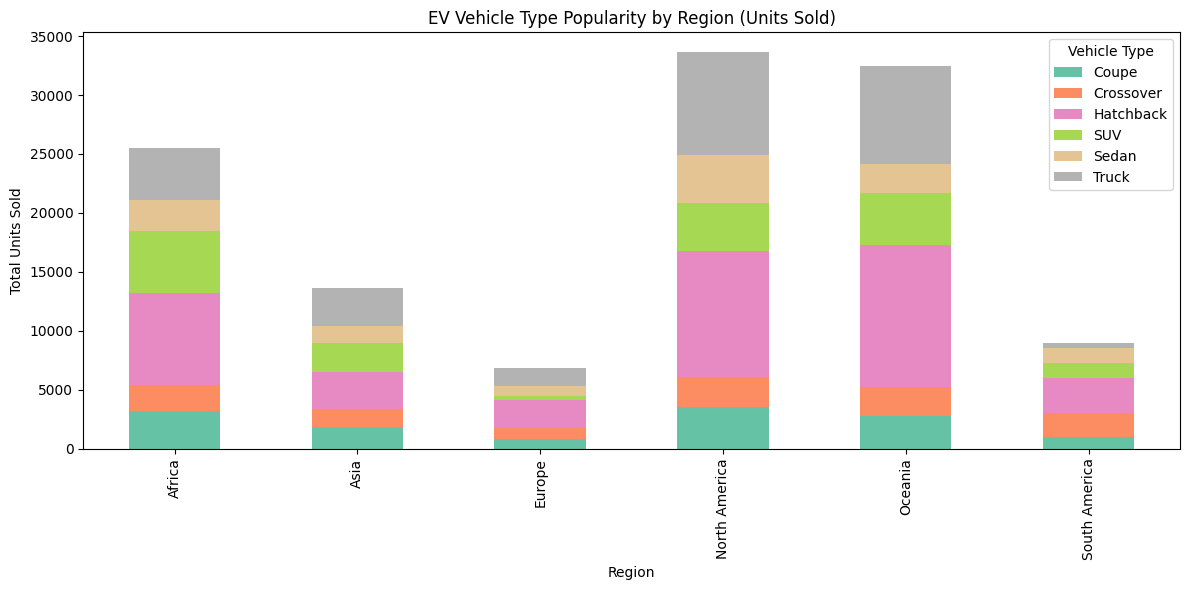

In [ ]:
vechile_type_popularity.plot(kind='bar', stacked=True,figsize=(12, 6),colormap='Set2')

plt.title('EV Vehicle Type Popularity by Region (Units Sold)')
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

# **Which Region had more EV sales to check which are leading or lagging in EV adoption**

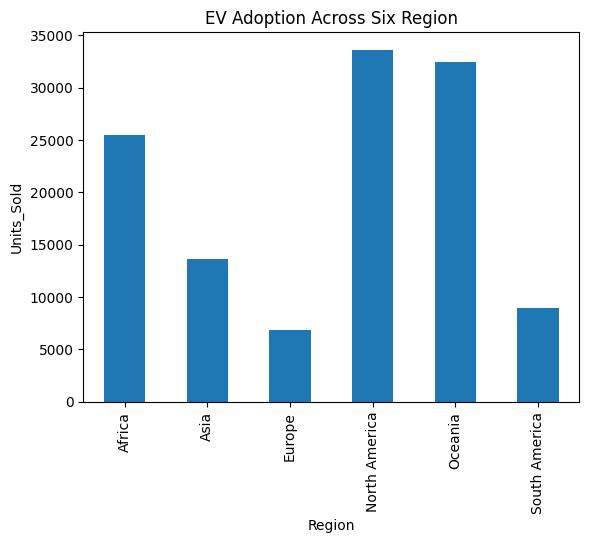

In [ ]:
df.groupby(['Region'])['Units_Sold'].sum().plot(kind='bar')
plt.title('EV Adoption Across Six Region')
plt.xlabel('Region')
plt.ylabel('Units_Sold')
plt.show()

# **Brands vs fast charing available or not**

In [ ]:
df.head(1)

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue,Months,Price
0,2023-07,Oceania,Toyota,i4,Crossover,62,6,High Income,No,260,3699780,07,14229.923077


In [ ]:
brand_fast_charge = df.pivot_table( index='Brand', columns='Fast_Charging_Option', values='Units_Sold',aggfunc='sum', fill_value=0)
brand_fast_charge

Fast_Charging_Option,No,Yes
Brand,,
BMW,4558,12045
BYD,4457,8110
Ford,6892,7281
Hyundai,7342,8834
Kia,7579,10294
Nissan,4885,7535
Tesla,2625,4917
Toyota,4160,8578
Volkswagen,5223,5690


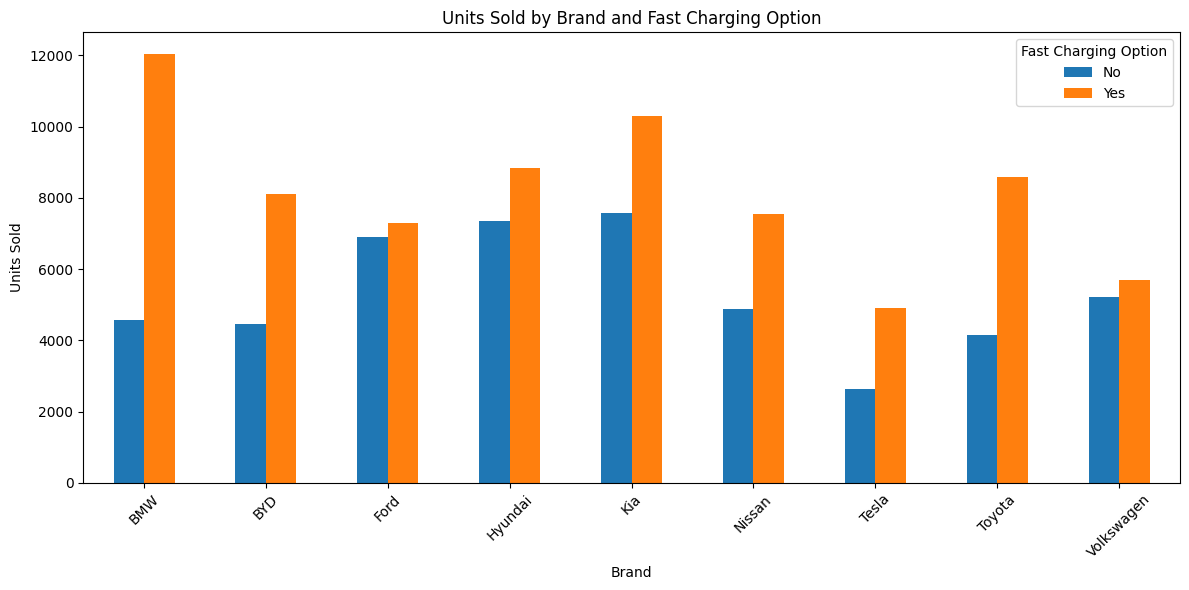

In [ ]:
brand_fast_charge.plot(kind='bar', figsize=(12, 6))

plt.title('Units Sold by Brand and Fast Charging Option')
plt.xlabel('Brand')
plt.ylabel('Units Sold')
plt.legend(title='Fast Charging Option')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# **Brand vs Revenue made and Units Sold in 2023**

In [ ]:
a = df.pivot_table( index='Brand', values='Revenue',aggfunc='mean',fill_value=0)
a

,Revenue
Brand,
BMW,4.973899e+06
BYD,5.331963e+06
Ford,4.541497e+06
Hyundai,5.172298e+06
Kia,4.717917e+06
Nissan,4.771069e+06
Tesla,5.437516e+06
Toyota,5.304983e+06
Volkswagen,4.350552e+06


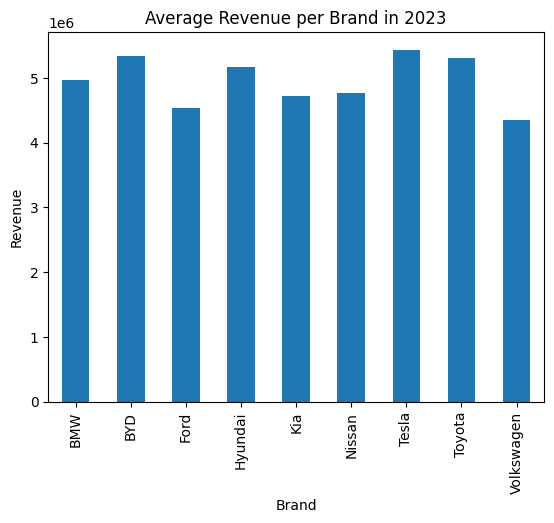

In [ ]:
df.groupby(['Brand'])['Revenue'].mean().plot(kind='bar')
plt.title('Average Revenue per Brand in 2023')
plt.xlabel('Brand')
plt.ylabel('Revenue')
plt.show()

In [ ]:
b = df.pivot_table( index='Brand', values='Units_Sold',aggfunc='sum', fill_value=0)
b

,Units_Sold
Brand,
BMW,16603
BYD,12567
Ford,14173
Hyundai,16176
Kia,17873
Nissan,12420
Tesla,7542
Toyota,12738
Volkswagen,10913


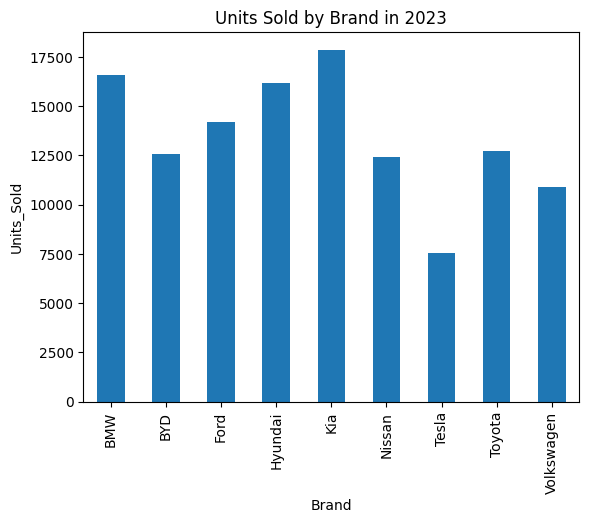

In [ ]:
df.groupby(['Brand'])['Units_Sold'].sum().plot(kind='bar')
plt.title('Units Sold by Brand in 2023')
plt.xlabel('Brand')
plt.ylabel('Units_Sold')
plt.show()

In [ ]:
c = pd.concat([b,a],axis=1)
c

,Units_Sold,Revenue
Brand,,
BMW,16603,4.973899e+06
BYD,12567,5.331963e+06
Ford,14173,4.541497e+06
Hyundai,16176,5.172298e+06
Kia,17873,4.717917e+06
Nissan,12420,4.771069e+06
Tesla,7542,5.437516e+06
Toyota,12738,5.304983e+06
Volkswagen,10913,4.350552e+06


# **Customer Segment vs brand around the world**

In [ ]:
segment_brand = df.pivot_table( index='Customer_Segment',columns='Brand',values='Units_Sold',aggfunc='sum',fill_value=0)
segment_brand
#

Brand,BMW,BYD,Ford,Hyundai,Kia,Nissan,Tesla,Toyota,Volkswagen
Customer_Segment,,,,,,,,,
Budget Conscious,2497,3018,2960,3964,5422,4258,2917,1675,2738
Eco-Conscious,1112,1895,1458,3493,3830,2332,618,3670,2719
High Income,4368,3397,3673,4122,2953,2382,1872,3229,1964
Middle Income,2723,1808,2155,2502,2874,1017,745,699,1396
Tech Enthusiast,5903,2449,3927,2095,2794,2431,1390,3465,2096


# **Region wise understanding the reason behind perchasing EV cars. This may give essence of factors people are considering while making purchase. The first analysis is done on North America(highest EV sold) then segment wise. Second analysis on Eroupe (Least EV sold) then segment wise.**

In [ ]:
df['Region'].unique()

array(['Oceania', 'North America', 'South America', 'Africa', 'Asia',
       'Europe'], dtype=object)

In [ ]:
df['Customer_Segment'].unique()

array(['High Income', 'Middle Income', 'Budget Conscious',
       'Tech Enthusiast', 'Eco-Conscious'], dtype=object)

In [ ]:
xx = pd.DataFrame(df.loc[(df['Customer_Segment']=='Budget Conscious') & (df['Region']=='Europe')])
xx.head(1)

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue,Months,Price
93,2023-07,Europe,Nissan,Model 3,Hatchback,49,3,Budget Conscious,Yes,218,4159356,07,19079.614679


In [ ]:
xx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 93 to 448
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  9 non-null      object 
 1   Region                9 non-null      object 
 2   Brand                 9 non-null      object 
 3   Model                 9 non-null      object 
 4   Vehicle_Type          9 non-null      object 
 5   Battery_Capacity_kWh  9 non-null      int64  
 6   Discount_Percentage   9 non-null      int64  
 7   Customer_Segment      9 non-null      object 
 8   Fast_Charging_Option  9 non-null      object 
 9   Units_Sold            9 non-null      int64  
 10  Revenue               9 non-null      int64  
 11  Months                9 non-null      object 
 12  Price                 9 non-null      float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.3+ KB


In [ ]:
xx.pivot_table( index='Brand', values='Units_Sold', aggfunc='sum', fill_value=0)

,Units_Sold
Brand,
Ford,784
Kia,367
Nissan,417
Toyota,156


In [ ]:
xx['Units_Sold'].corr(xx['Battery_Capacity_kWh'])

np.float64(-0.5868507238620929)

In [ ]:
xx['Units_Sold'].corr(xx['Discount_Percentage'])

np.float64(0.3668184221244636)

In [ ]:
xx['Units_Sold'].corr(xx['Price'])

np.float64(-0.47221771789468)